In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2023-01-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2023_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-01-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10450    ÏÇ¨ÏÉÅÍµ¨  17250    ÏÇ¨ÏÉÅÍµ¨   
1   2023-01-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   8417    ÏÇ¨ÏÉÅÍµ¨   9264    ÏÇ¨ÏÉÅÍµ¨   
2   2023-01-12     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  13035    ÏÇ¨ÏÉÅÍµ¨  15980    ÏÇ¨ÏÉÅÍµ¨   
3   2023-01-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6111    ÏÇ¨ÏÉÅÍµ¨   7975    ÏÇ¨ÏÉÅÍµ¨   
4   2023-01-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990    ÏÇ¨ÏÉÅÍµ¨   4180    ÏÇ¨ÏÉÅÍµ¨   
5   2023-01-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   9800    ÏÇ¨ÏÉÅÍµ¨  14990    ÏÇ¨ÏÉÅÍµ¨   
6   2023-01-12     ÎåÄÌåå                      1.0„éè   2780    ÏÇ¨ÏÉÅÍµ¨   3390    ÏÇ¨ÏÉÅÍµ¨   
7   2023-01-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9950    ÏÇ¨ÏÉÅÍµ¨  10400    ÏÇ¨ÏÉÅÍµ¨   
8   2023-01-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194    ÏÇ¨ÏÉÅÍµ¨   5194    ÏÇ¨ÏÉÅÍµ¨   
9   2023-01-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820    ÏÇ¨ÏÉÅÍµ¨    820    ÏÇ¨ÏÉÅÍµ¨   
10  2023-01-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550    ÏÇ¨ÏÉÅÍµ¨   1650    ÏÇ¨ÏÉÅÍµ¨   
11  2023-01-12      Î¨¥                   2.0„éè 1Í∞ú   2329    ÏÇ¨ÏÉÅÍµ¨   2400    ÏÇ¨ÏÉÅÍµ¨   
12  2023-01-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4590    ÏÇ¨ÏÉÅÍµ¨   4780    ÏÇ¨ÏÉÅÍµ¨   
13  2023-01-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   9320    ÏÇ¨ÏÉÅÍµ¨   9900    ÏÇ¨ÏÉÅÍµ¨   
14  2023-01-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  46740    ÏÇ¨ÏÉÅÍµ¨  67360    ÏÇ¨ÏÉÅÍµ¨   
15  2023-01-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2988    ÏÇ¨ÏÉÅÍµ¨   3760    ÏÇ¨ÏÉÅÍµ¨   
16  2023-01-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   7629    ÏÇ¨ÏÉÅÍµ¨   9450    ÏÇ¨ÏÉÅÍµ¨   
17  2023-01-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  17560    ÏÇ¨ÏÉÅÍµ¨  18400    ÏÇ¨ÏÉÅÍµ¨   
18  2023-01-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  29610    ÏÇ¨ÏÉÅÍµ¨  29970    ÏÇ¨ÏÉÅÍµ¨   
19  2023-01-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2233    ÏÇ¨ÏÉÅÍµ¨   2816    ÏÇ¨ÏÉÅÍµ¨   
20  2023-01-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980    ÏÇ¨ÏÉÅÍµ¨   1980    ÏÇ¨ÏÉÅÍµ¨   
21  2023-01-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2023-01-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  43750    ÏÇ¨ÏÉÅÍµ¨  49900    ÏÇ¨ÏÉÅÍµ¨   
23  2023-01-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480    ÏÇ¨ÏÉÅÍµ¨   9216    ÏÇ¨ÏÉÅÍµ¨   
24  2023-01-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44900    ÏÇ¨ÏÉÅÍµ¨  59800    ÏÇ¨ÏÉÅÍµ¨   
25  2023-01-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3044    ÏÇ¨ÏÉÅÍµ¨   3550    ÏÇ¨ÏÉÅÍµ¨   
26  2023-01-12    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)  11810    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
27  2023-01-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    950    ÏÇ¨ÏÉÅÍµ¨    950    ÏÇ¨ÏÉÅÍµ¨   
28  2023-01-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   9280    ÏÇ¨ÏÉÅÍµ¨   9600    ÏÇ¨ÏÉÅÍµ¨   
29  2023-01-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2990    ÏÇ¨ÏÉÅÍµ¨   3000    ÏÇ¨ÏÉÅÍµ¨   
30  2023-01-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2580    ÏÇ¨ÏÉÅÍµ¨   2980    ÏÇ¨ÏÉÅÍµ¨   
31  2023-01-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  22037    ÏÇ¨ÏÉÅÍµ¨  25946    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    6800  65.07%  13,850  
1     847  10.06%   8,841  
2    2945  22.59%  14,508  
3    1864   30.5%   7,043  
4     190   4.76%   4,085  
5    5190  52.96%  12,395  
6     610  21.94%   3,085  
7     450   4.52%  10,175  
8       0    0.0%   5,194  
9       0    0.0%     820  
10    100   6.45%   1,600  
11     71   3.05%   2,365  
12    190   4.14%   4,685  
13    580   6.22%   9,6

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2023-04-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2023_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-04-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7417    ÏÇ¨ÏÉÅÍµ¨  17250    ÏÇ¨ÏÉÅÍµ¨   
1   2023-04-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   7980    ÏÇ¨ÏÉÅÍµ¨   7980    ÏÇ¨ÏÉÅÍµ¨   
2   2023-04-13     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  15980    ÏÇ¨ÏÉÅÍµ¨  18625    ÏÇ¨ÏÉÅÍµ¨   
3   2023-04-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6250    ÏÇ¨ÏÉÅÍµ¨  11640    ÏÇ¨ÏÉÅÍµ¨   
4   2023-04-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3980    ÏÇ¨ÏÉÅÍµ¨   3990    ÏÇ¨ÏÉÅÍµ¨   
5   2023-04-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7840    ÏÇ¨ÏÉÅÍµ¨  14990    ÏÇ¨ÏÉÅÍµ¨   
6   2023-04-13     ÎåÄÌåå                      1.0„éè   3580    ÏÇ¨ÏÉÅÍµ¨   3780    ÏÇ¨ÏÉÅÍµ¨   
7   2023-04-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12450    ÏÇ¨ÏÉÅÍµ¨  13900    ÏÇ¨ÏÉÅÍµ¨   
8   2023-04-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194    ÏÇ¨ÏÉÅÍµ¨   5194    ÏÇ¨ÏÉÅÍµ¨   
9   2023-04-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    820    ÏÇ¨ÏÉÅÍµ¨    820    ÏÇ¨ÏÉÅÍµ¨   
10  2023-04-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550    ÏÇ¨ÏÉÅÍµ¨   1650    ÏÇ¨ÏÉÅÍµ¨   
11  2023-04-13      Î¨¥                   2.0„éè 1Í∞ú   2210    ÏÇ¨ÏÉÅÍµ¨   2500    ÏÇ¨ÏÉÅÍµ¨   
12  2023-04-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4590    ÏÇ¨ÏÉÅÍµ¨   4780    ÏÇ¨ÏÉÅÍµ¨   
13  2023-04-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú  11670    ÏÇ¨ÏÉÅÍµ¨  13200    ÏÇ¨ÏÉÅÍµ¨   
14  2023-04-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  33200    ÏÇ¨ÏÉÅÍµ¨  37620    ÏÇ¨ÏÉÅÍµ¨   
15  2023-04-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3133    ÏÇ¨ÏÉÅÍµ¨   4700    ÏÇ¨ÏÉÅÍµ¨   
16  2023-04-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3430    ÏÇ¨ÏÉÅÍµ¨   9450    ÏÇ¨ÏÉÅÍµ¨   
17  2023-04-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  17560    ÏÇ¨ÏÉÅÍµ¨  18800    ÏÇ¨ÏÉÅÍµ¨   
18  2023-04-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  29970    ÏÇ¨ÏÉÅÍµ¨  32010    ÏÇ¨ÏÉÅÍµ¨   
19  2023-04-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2082    ÏÇ¨ÏÉÅÍµ¨   2816    ÏÇ¨ÏÉÅÍµ¨   
20  2023-04-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980    ÏÇ¨ÏÉÅÍµ¨   1980    ÏÇ¨ÏÉÅÍµ¨   
21  2023-04-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2023-04-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  46800    ÏÇ¨ÏÉÅÍµ¨  52450    ÏÇ¨ÏÉÅÍµ¨   
23  2023-04-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480    ÏÇ¨ÏÉÅÍµ¨  10176    ÏÇ¨ÏÉÅÍµ¨   
24  2023-04-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  44900    ÏÇ¨ÏÉÅÍµ¨  59900    ÏÇ¨ÏÉÅÍµ¨   
25  2023-04-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3100    ÏÇ¨ÏÉÅÍµ¨   3666    ÏÇ¨ÏÉÅÍµ¨   
26  2023-04-13    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)  11815    ÏÇ¨ÏÉÅÍµ¨  16635    ÏÇ¨ÏÉÅÍµ¨   
27  2023-04-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    950    ÏÇ¨ÏÉÅÍµ¨    950    ÏÇ¨ÏÉÅÍµ¨   
28  2023-04-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë  10600    ÏÇ¨ÏÉÅÍµ¨  11690    ÏÇ¨ÏÉÅÍµ¨   
29  2023-04-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2990    ÏÇ¨ÏÉÅÍµ¨   3000    ÏÇ¨ÏÉÅÍµ¨   
30  2023-04-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3700    ÏÇ¨ÏÉÅÍµ¨   3730    ÏÇ¨ÏÉÅÍµ¨   
31  2023-04-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  21746    ÏÇ¨ÏÉÅÍµ¨  25200    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    9833  132.57%  12,334  
1       0     0.0%   7,980  
2    2645   16.55%  17,303  
3    5390   86.24%   8,945  
4      10    0.25%   3,985  
5    7150    91.2%  11,415  
6     200    5.59%   3,680  
7    1450   11.65%  13,175  
8       0     0.0%   5,194  
9       0     0.0%     820  
10    100    6.45%   1,600  
11    290   13.12%   2,355  
12    190    4.14%   4,685  
13   1530

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2023-07-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2023_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-07-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg  10450    ÏÇ¨ÏÉÅÍµ¨  17250    ÏÇ¨ÏÉÅÍµ¨   
1   2023-07-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   7980    ÏÇ¨ÏÉÅÍµ¨   7980    ÏÇ¨ÏÉÅÍµ¨   
2   2023-07-13     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11980    ÏÇ¨ÏÉÅÍµ¨  13915    ÏÇ¨ÏÉÅÍµ¨   
3   2023-07-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   6635    ÏÇ¨ÏÉÅÍµ¨   6875    ÏÇ¨ÏÉÅÍµ¨   
4   2023-07-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3980    ÏÇ¨ÏÉÅÍµ¨   3990    ÏÇ¨ÏÉÅÍµ¨   
5   2023-07-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè  10800    ÏÇ¨ÏÉÅÍµ¨  11990    ÏÇ¨ÏÉÅÍµ¨   
6   2023-07-13     ÎåÄÌåå                      1.0„éè   2960    ÏÇ¨ÏÉÅÍµ¨   3250    ÏÇ¨ÏÉÅÍµ¨   
7   2023-07-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12450    ÏÇ¨ÏÉÅÍµ¨  14400    ÏÇ¨ÏÉÅÍµ¨   
8   2023-07-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   5194    ÏÇ¨ÏÉÅÍµ¨   5194    ÏÇ¨ÏÉÅÍµ¨   
9   2023-07-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780    ÏÇ¨ÏÉÅÍµ¨    780    ÏÇ¨ÏÉÅÍµ¨   
10  2023-07-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550    ÏÇ¨ÏÉÅÍµ¨   1650    ÏÇ¨ÏÉÅÍµ¨   
11  2023-07-13      Î¨¥                   2.0„éè 1Í∞ú   2190    ÏÇ¨ÏÉÅÍµ¨   2520    ÏÇ¨ÏÉÅÍµ¨   
12  2023-07-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420    ÏÇ¨ÏÉÅÍµ¨   4480    ÏÇ¨ÏÉÅÍµ¨   
13  2023-07-13     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8330    ÏÇ¨ÏÉÅÍµ¨  11360    ÏÇ¨ÏÉÅÍµ¨   
14  2023-07-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  32280    ÏÇ¨ÏÉÅÍµ¨  37620    ÏÇ¨ÏÉÅÍµ¨   
15  2023-07-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4433    ÏÇ¨ÏÉÅÍµ¨   5600    ÏÇ¨ÏÉÅÍµ¨   
16  2023-07-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4165    ÏÇ¨ÏÉÅÍµ¨  14025    ÏÇ¨ÏÉÅÍµ¨   
17  2023-07-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  17560    ÏÇ¨ÏÉÅÍµ¨  17580    ÏÇ¨ÏÉÅÍµ¨   
18  2023-07-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  37470    ÏÇ¨ÏÉÅÍµ¨  37470    ÏÇ¨ÏÉÅÍµ¨   
19  2023-07-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2066    ÏÇ¨ÏÉÅÍµ¨   2816    ÏÇ¨ÏÉÅÍµ¨   
20  2023-07-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1980    ÏÇ¨ÏÉÅÍµ¨   1980    ÏÇ¨ÏÉÅÍµ¨   
21  2023-07-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2023-07-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  51900    ÏÇ¨ÏÉÅÍµ¨  59950    ÏÇ¨ÏÉÅÍµ¨   
23  2023-07-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480    ÏÇ¨ÏÉÅÍµ¨   8580    ÏÇ¨ÏÉÅÍµ¨   
24  2023-07-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  49900    ÏÇ¨ÏÉÅÍµ¨  59800    ÏÇ¨ÏÉÅÍµ¨   
25  2023-07-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2350    ÏÇ¨ÏÉÅÍµ¨   2966    ÏÇ¨ÏÉÅÍµ¨   
26  2023-07-13    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)  11815    ÏÇ¨ÏÉÅÍµ¨  14800    ÏÇ¨ÏÉÅÍµ¨   
27  2023-07-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    950    ÏÇ¨ÏÉÅÍµ¨    950    ÏÇ¨ÏÉÅÍµ¨   
28  2023-07-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë  10600    ÏÇ¨ÏÉÅÍµ¨  10600    ÏÇ¨ÏÉÅÍµ¨   
29  2023-07-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2990    ÏÇ¨ÏÉÅÍµ¨   3000    ÏÇ¨ÏÉÅÍµ¨   
30  2023-07-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3730    ÏÇ¨ÏÉÅÍµ¨   3730    ÏÇ¨ÏÉÅÍµ¨   
31  2023-07-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  22306    ÏÇ¨ÏÉÅÍµ¨  25200    ÏÇ¨ÏÉÅÍµ¨   

    Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0   6800   65.07%  13,850  
1      0     0.0%   7,980  
2   1935   16.15%  12,948  
3    240    3.62%   6,755  
4     10    0.25%   3,985  
5   1190   11.02%  11,395  
6    290     9.8%   3,105  
7   1950   15.66%  13,425  
8      0     0.0%   5,194  
9      0     0.0%     780  
10   100    6.45%   1,600  
11   330   15.07%   2,355  
12    60    1.36%   4,450  
13  3030   36.37%   9,8

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "ÏÇ¨ÏÉÅÍµ¨"
region_code = "11"
target_date = "2023-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("ÏÇ¨ÏÉÅÍµ¨2023_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2023-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   9675    ÏÇ¨ÏÉÅÍµ¨  17250    ÏÇ¨ÏÉÅÍµ¨   
1   2023-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   7980    ÏÇ¨ÏÉÅÍµ¨   7980    ÏÇ¨ÏÉÅÍµ¨   
2   2023-10-12     Í∞àÏπò       60cmÏ†ïÎèÑ 500g 1ÎßàÎ¶¨(ÎÉâÎèô)  11925    ÏÇ¨ÏÉÅÍµ¨  11980    ÏÇ¨ÏÉÅÍµ¨   
3   2023-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   5625    ÏÇ¨ÏÉÅÍµ¨   6633    ÏÇ¨ÏÉÅÍµ¨   
4   2023-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3990    ÏÇ¨ÏÉÅÍµ¨   3990    ÏÇ¨ÏÉÅÍµ¨   
5   2023-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè  11975    ÏÇ¨ÏÉÅÍµ¨  11990    ÏÇ¨ÏÉÅÍµ¨   
6   2023-10-12     ÎåÄÌåå                      1.0„éè   3990    ÏÇ¨ÏÉÅÍµ¨   4000    ÏÇ¨ÏÉÅÍµ¨   
7   2023-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  12950    ÏÇ¨ÏÉÅÍµ¨  13750    ÏÇ¨ÏÉÅÍµ¨   
8   2023-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   6056    ÏÇ¨ÏÉÅÍµ¨   6067    ÏÇ¨ÏÉÅÍµ¨   
9   2023-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    780    ÏÇ¨ÏÉÅÍµ¨    780    ÏÇ¨ÏÉÅÍµ¨   
10  2023-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1550    ÏÇ¨ÏÉÅÍµ¨   1650    ÏÇ¨ÏÉÅÍµ¨   
11  2023-10-12      Î¨¥                   2.0„éè 1Í∞ú   2180    ÏÇ¨ÏÉÅÍµ¨   2490    ÏÇ¨ÏÉÅÍµ¨   
12  2023-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   4420    ÏÇ¨ÏÉÅÍµ¨   4420    ÏÇ¨ÏÉÅÍµ¨   
13  2023-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   8840    ÏÇ¨ÏÉÅÍµ¨   8880    ÏÇ¨ÏÉÅÍµ¨   
14  2023-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  31200    ÏÇ¨ÏÉÅÍµ¨  47100    ÏÇ¨ÏÉÅÍµ¨   
15  2023-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   6000    ÏÇ¨ÏÉÅÍµ¨   6900    ÏÇ¨ÏÉÅÍµ¨   
16  2023-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   8283    ÏÇ¨ÏÉÅÍµ¨  11513    ÏÇ¨ÏÉÅÍµ¨   
17  2023-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  17580    ÏÇ¨ÏÉÅÍµ¨  24460    ÏÇ¨ÏÉÅÍµ¨   
18  2023-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  29700    ÏÇ¨ÏÉÅÍµ¨  39990    ÏÇ¨ÏÉÅÍµ¨   
19  2023-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2816    ÏÇ¨ÏÉÅÍµ¨   2816    ÏÇ¨ÏÉÅÍµ¨   
20  2023-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   2380    ÏÇ¨ÏÉÅÍµ¨   2380    ÏÇ¨ÏÉÅÍµ¨   
21  2023-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1380    ÏÇ¨ÏÉÅÍµ¨   1380    ÏÇ¨ÏÉÅÍµ¨   
22  2023-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  50350    ÏÇ¨ÏÉÅÍµ¨  59350    ÏÇ¨ÏÉÅÍµ¨   
23  2023-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   8480    ÏÇ¨ÏÉÅÍµ¨   8480    ÏÇ¨ÏÉÅÍµ¨   
24  2023-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  62900    ÏÇ¨ÏÉÅÍµ¨  72900    ÏÇ¨ÏÉÅÍµ¨   
25  2023-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2160    ÏÇ¨ÏÉÅÍµ¨   3050    ÏÇ¨ÏÉÅÍµ¨   
26  2023-10-12    Ïò§ÏßïÏñ¥       25cmÏ†ïÎèÑ 500g 2ÎßàÎ¶¨(ÎÉâÎèô)  11815    ÏÇ¨ÏÉÅÍµ¨  15800    ÏÇ¨ÏÉÅÍµ¨   
27  2023-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©   1060    ÏÇ¨ÏÉÅÍµ¨   1060    ÏÇ¨ÏÉÅÍµ¨   
28  2023-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë  10600    ÏÇ¨ÏÉÅÍµ¨  10600    ÏÇ¨ÏÉÅÍµ¨   
29  2023-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2990    ÏÇ¨ÏÉÅÍµ¨   3000    ÏÇ¨ÏÉÅÍµ¨   
30  2023-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   3730    ÏÇ¨ÏÉÅÍµ¨   3730    ÏÇ¨ÏÉÅÍµ¨   
31  2023-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  20618    ÏÇ¨ÏÉÅÍµ¨  22306    ÏÇ¨ÏÉÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    7575  78.29%  13,463  
1       0    0.0%   7,980  
2      55   0.46%  11,953  
3    1008  17.92%   6,129  
4       0    0.0%   3,990  
5      15   0.13%  11,983  
6      10   0.25%   3,995  
7     800   6.18%  13,350  
8      11   0.18%   6,062  
9       0    0.0%     780  
10    100   6.45%   1,600  
11    310  14.22%   2,335  
12      0    0.0%   4,420  
13     40   0.45%   8,8

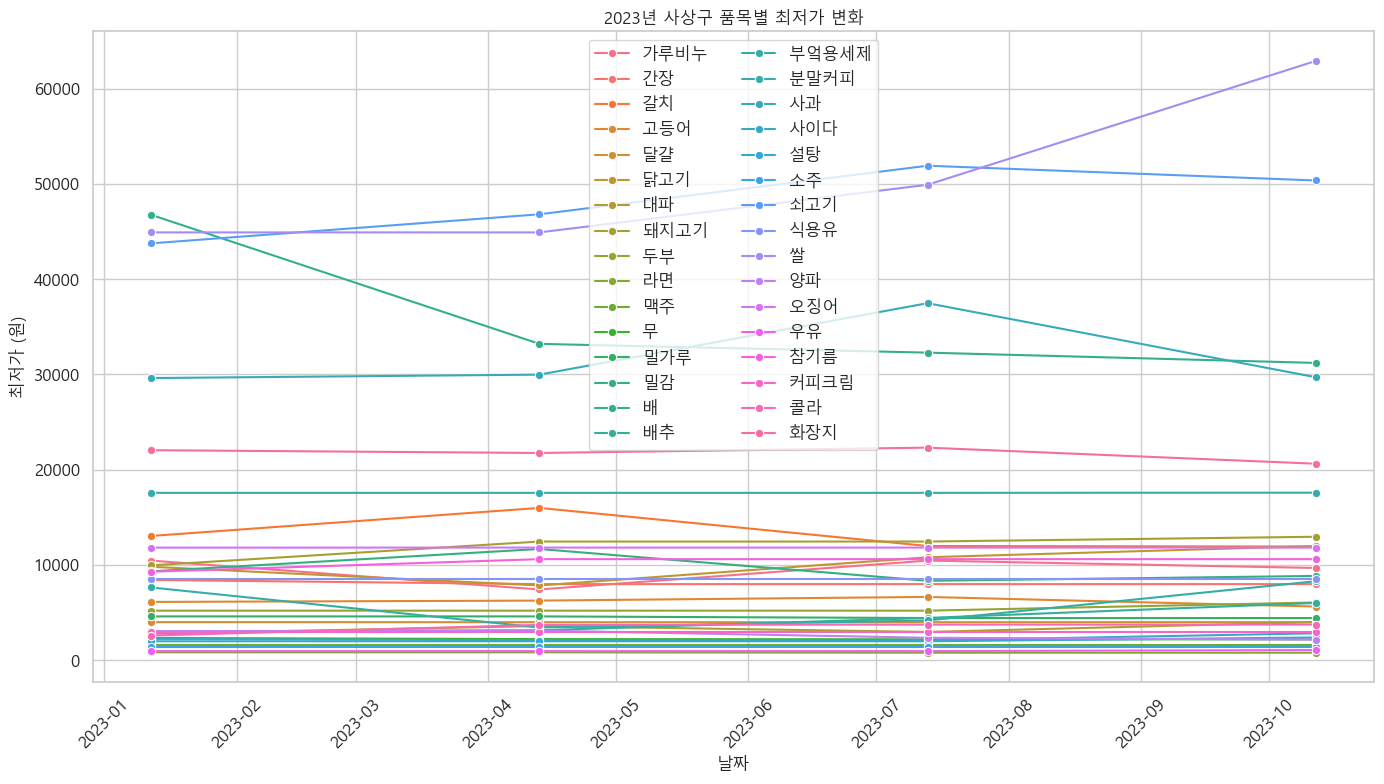

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2023ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2023_min.csv", index=False, encoding="utf-8-sig")

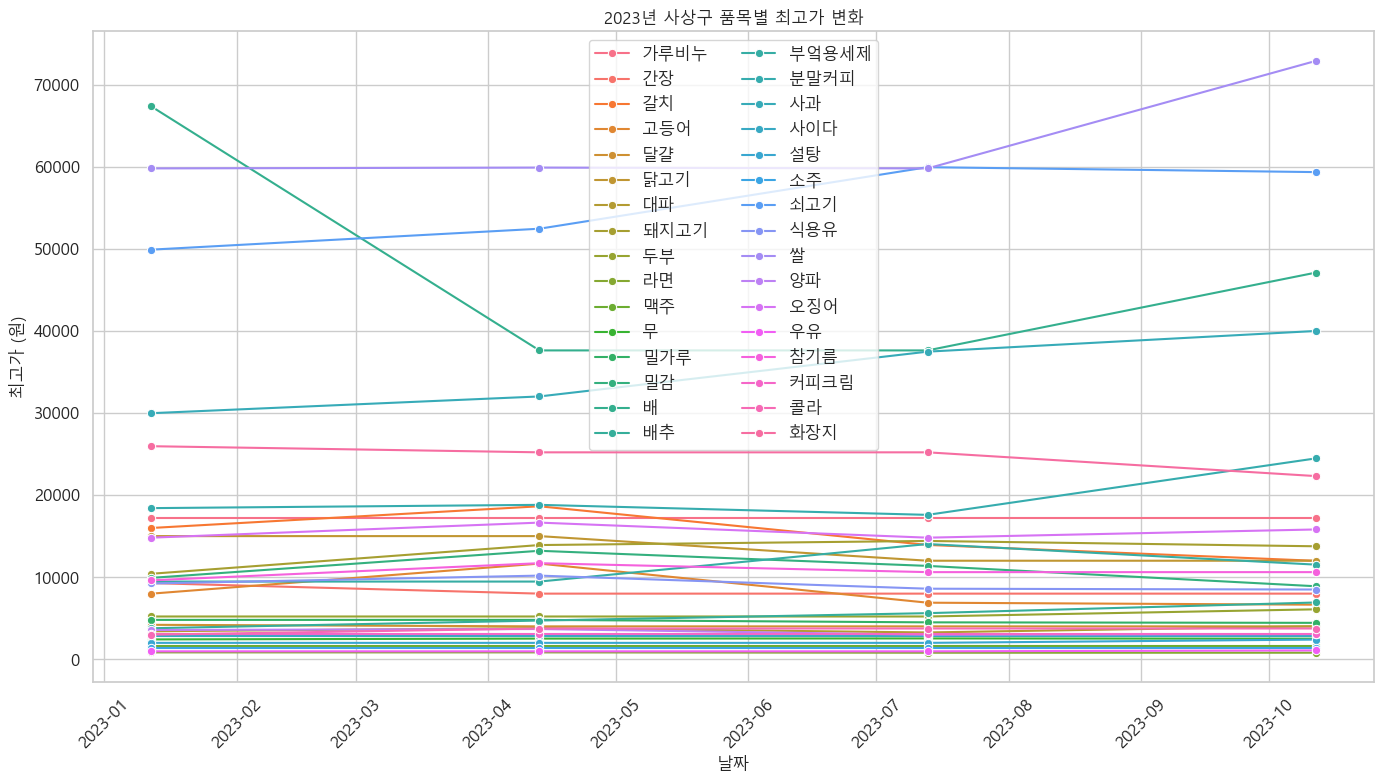

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_1q.csv")
q2 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_2q.csv")
q3 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_3q.csv")
q4 = pd.read_csv("ÏÇ¨ÏÉÅÍµ¨2023_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2023ÎÖÑ ÏÇ¨ÏÉÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("ÏÇ¨ÏÉÅÍµ¨2023_max.csv", index=False, encoding="utf-8-sig")